In [85]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform

def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

## Exercise 1

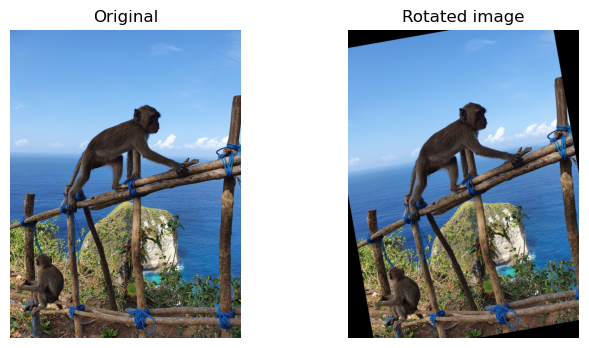

In [14]:
im_org = io.imread('data/NusaPenida.png')

# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 2

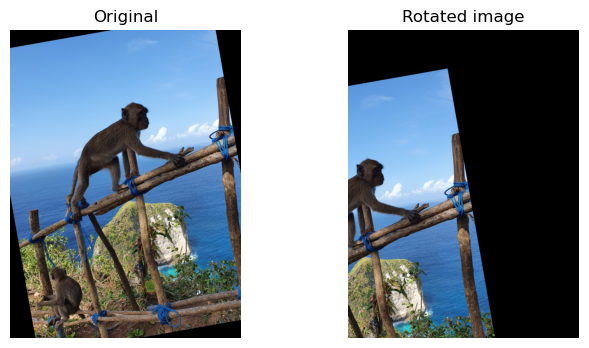

In [15]:
rot_center = [1000, 2000]
rotated_img2 = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(rotated_img, rotated_img2, "Rotated image")

## Exercise 3

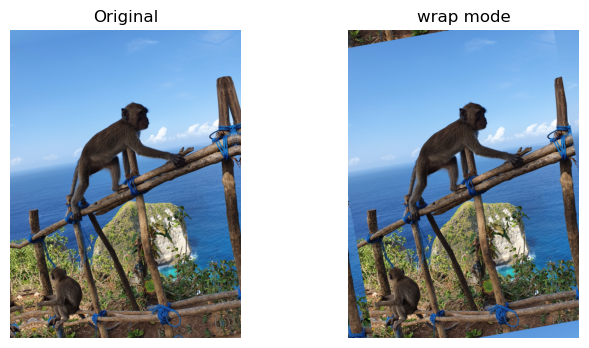

In [25]:
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
rotated_img2 = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(rotated_img, rotated_img2, "wrap mode")

## Exercise 4

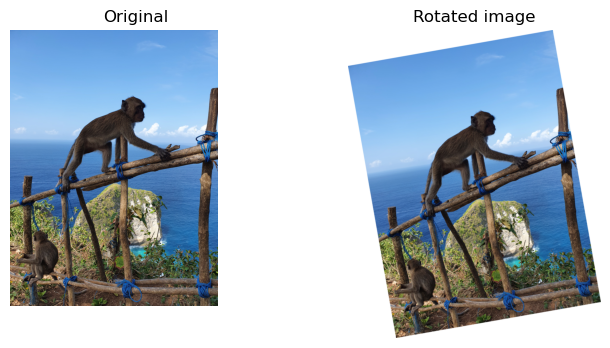

In [34]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 5

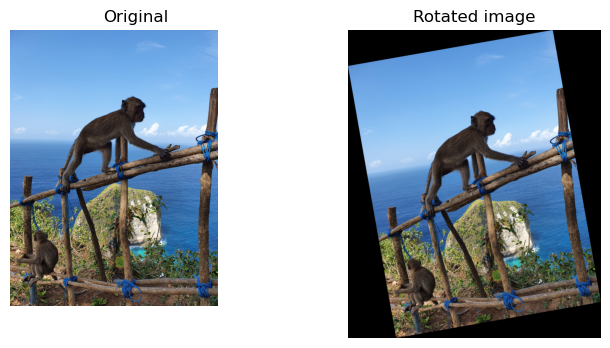

In [35]:
rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 6: Euclidean image transformation

In [37]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [0, 0]
#trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


## Exercise 7

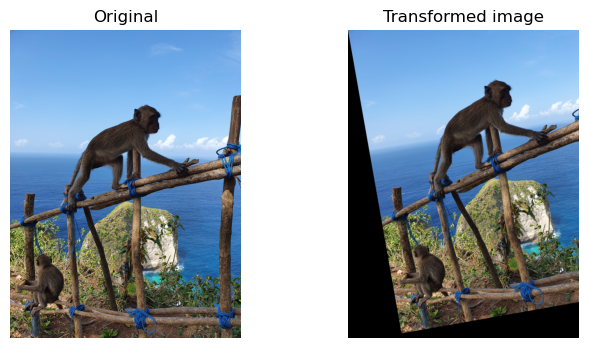

In [40]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Transformed image")

## Exercise 8: Inverse transformation

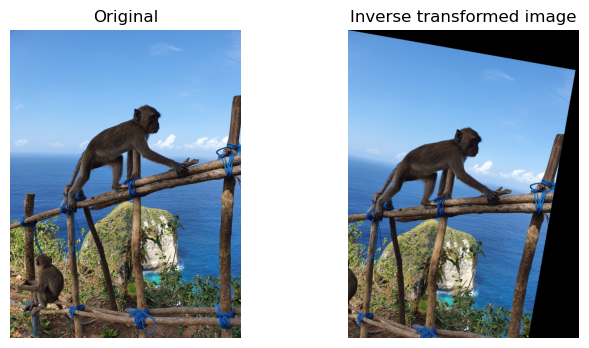

In [41]:
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Inverse transformed image")

## Exercise 9: Similarity transform of image

In [46]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
scale = 0.6
tform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale = scale)
print(tform.params)

[[ 0.5795555  -0.15529143 40.        ]
 [ 0.15529143  0.5795555  30.        ]
 [ 0.          0.          1.        ]]


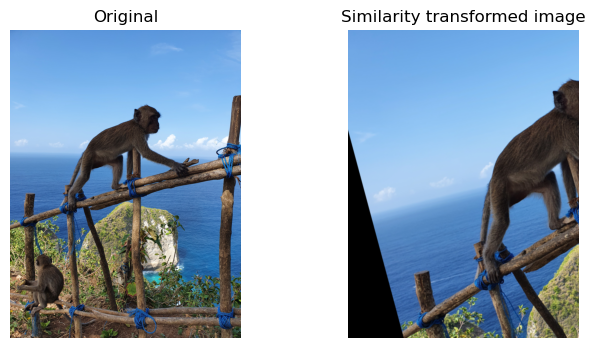

In [48]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Similarity transformed image")

## Exercise 10: The swirl image transformation

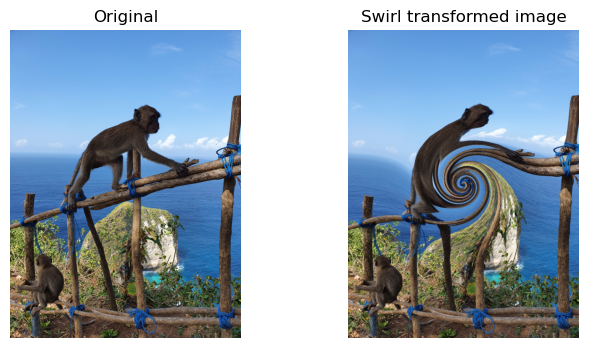

In [51]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
show_comparison(im_org, swirl_img, "Swirl transformed image")

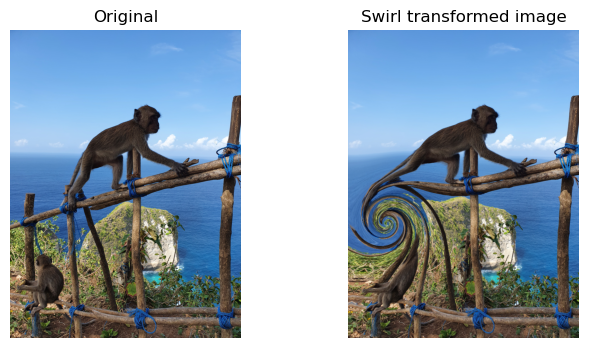

In [59]:
str = 10
rad = 300
c = [100, 500]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Swirl transformed image")

## Exercise 11: Landmark based registration

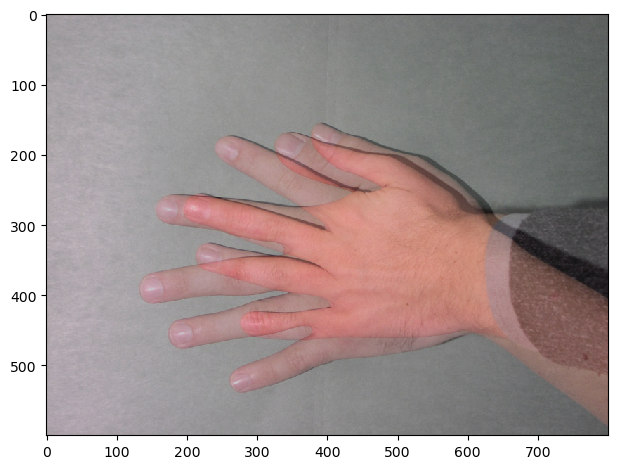

In [61]:
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

## Exercise 12: Manual landmark annotation

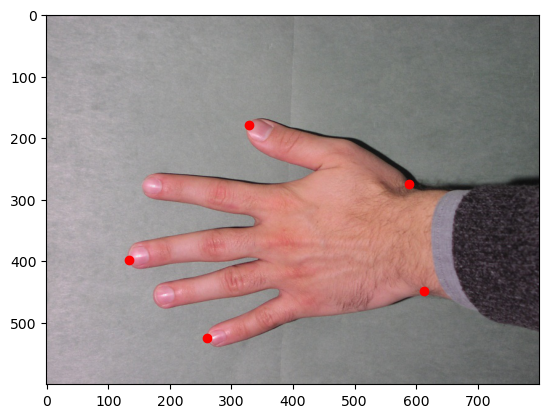

In [62]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

## Exercise 13

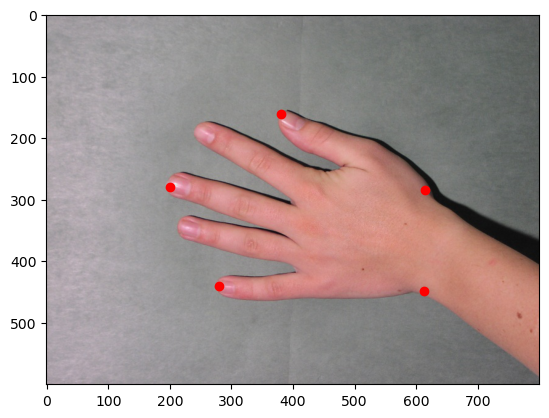

In [79]:
dst = np.array([[615, 284], [380, 160], [200, 280], [280, 440], [613, 448]])

plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

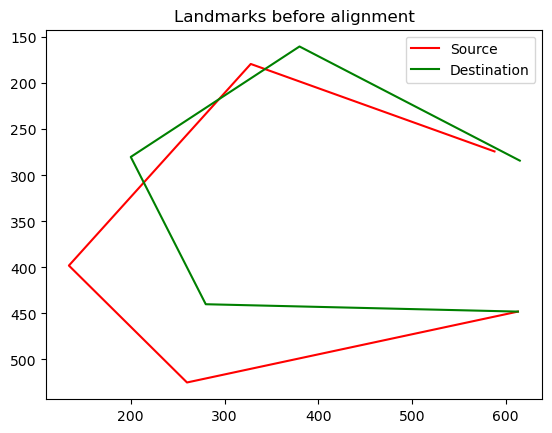

In [80]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

## Exercise 14 - 16

In [81]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 29799


In [82]:
tform = EuclideanTransform()
tform.estimate(src, dst)

True

In [86]:
src_transform = matrix_transform(src, tform.params)

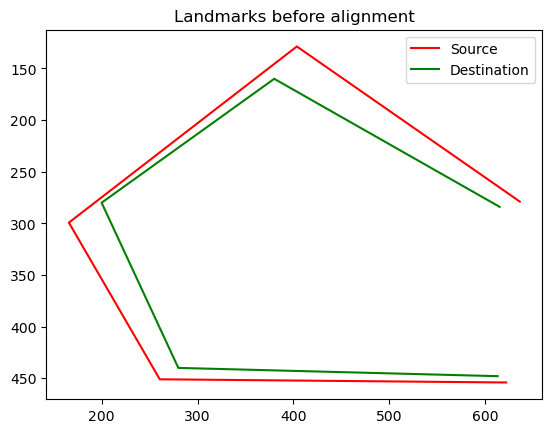

In [89]:
fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

In [90]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 4155.709872897715


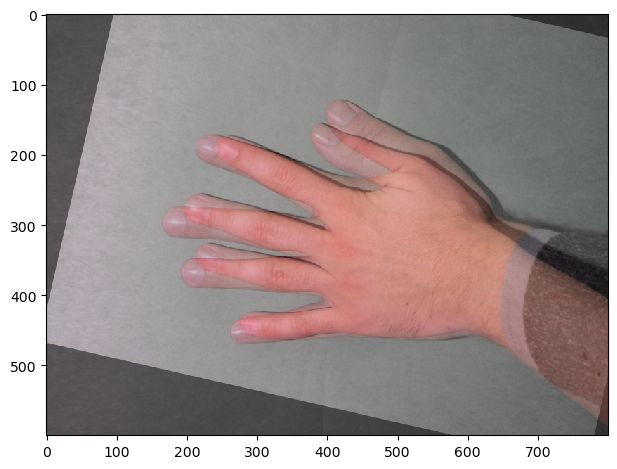

In [91]:
warped = warp(src_img, tform.inverse)
blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()